In [5]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
from env import host, username, password
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [7]:
def get_connection(db, user=username, host=host, password=password):
    '''
    This function makes a connection with and pulls from the CodeUp database. It 
    takes the database name as its argument, pulls other login info from env.py.
    Make sure you save this as a variable or it will print out your sensitive user
    info as plain text. 
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [8]:
url = get_connection('grocery_db')

In [9]:
sql = 'SELECT * FROM grocery_customers'

In [10]:
df = pd.read_sql(sql, url, index_col = 'customer_id')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 30.9 KB


In [13]:
fdd_df = df[['Frozen', 'Detergents_Paper', 'Delicassen']]

In [14]:
fdd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Frozen            440 non-null    int64
 1   Detergents_Paper  440 non-null    int64
 2   Delicassen        440 non-null    int64
dtypes: int64(3)
memory usage: 13.8 KB


In [17]:
scaler = MinMaxScaler()

fdd_scaled = scaler.fit_transform(fdd_df)

In [18]:
fdd_scaled

array([[0.0031063 , 0.0654272 , 0.02784731],
       [0.02854842, 0.08058985, 0.03698373],
       [0.03911643, 0.08605232, 0.16355861],
       ...,
       [0.00677142, 0.36346267, 0.03888194],
       [0.01664914, 0.00404174, 0.04426366],
       [0.00065742, 0.01161082, 0.00102211]])

In [19]:
dbsc = DBSCAN(eps = .1, min_samples = 20)
dbsc.fit(fdd_scaled)

DBSCAN(eps=0.1, min_samples=20)

In [20]:
columns = ['Frozen', 'Detergents_Paper', 'Delicassen']
scaled_columns = ["Scaled_" + column for column in columns]

In [21]:
scaled_df = pd.DataFrame(fdd_scaled, columns = scaled_columns)

In [22]:
grocery_df = df.merge(scaled_df, on = df.index)
grocery_df.head()

,key_0,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Frozen,Scaled_Detergents_Paper,Scaled_Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338,0.003106,0.065427,0.027847
1,1,2,3,7057,9810,9568,1762,3293,1776,0.028548,0.080590,0.036984
2,2,2,3,6353,8808,7684,2405,3516,7844,0.039116,0.086052,0.163559
3,3,1,3,13265,1196,4221,6404,507,1788,0.104842,0.012346,0.037234
4,4,2,3,22615,5410,7198,3915,1777,5185,0.063934,0.043455,0.108093


In [23]:
grocery_df = grocery_df.drop(columns = 'key_0')

In [24]:
grocery_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Frozen,Scaled_Detergents_Paper,Scaled_Delicassen
0,2,3,12669,9656,7561,214,2674,1338,0.003106,0.065427,0.027847
1,2,3,7057,9810,9568,1762,3293,1776,0.028548,0.080590,0.036984
2,2,3,6353,8808,7684,2405,3516,7844,0.039116,0.086052,0.163559
3,1,3,13265,1196,4221,6404,507,1788,0.104842,0.012346,0.037234
4,2,3,22615,5410,7198,3915,1777,5185,0.063934,0.043455,0.108093
...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0.215469,0.004385,0.045912
436,1,3,39228,1431,764,4510,93,2346,0.073713,0.002205,0.048874
437,2,3,14531,15488,30243,437,14841,1867,0.006771,0.363463,0.038882
438,1,3,10290,1981,2232,1038,168,2125,0.016649,0.004042,0.044264


In [25]:
grocery_df['labels'] = dbsc.labels_
grocery_df.labels.value_counts()

 0    423
-1     17
Name: labels, dtype: int64

<AxesSubplot:xlabel='Delicassen', ylabel='Frozen'>

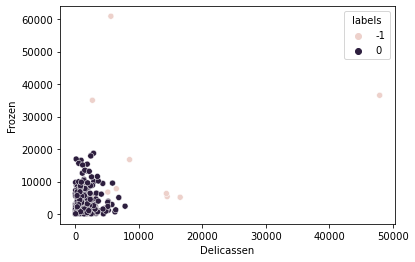

In [27]:
sns.scatterplot(data = grocery_df, x = 'Delicassen', y = 'Frozen', hue = 'labels')

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Frozen'>

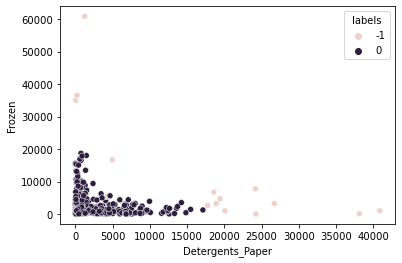

In [28]:
sns.scatterplot(data = grocery_df, x = 'Detergents_Paper', y = 'Frozen', hue = 'labels')

Text(0.5, 0, 'Delicassen')

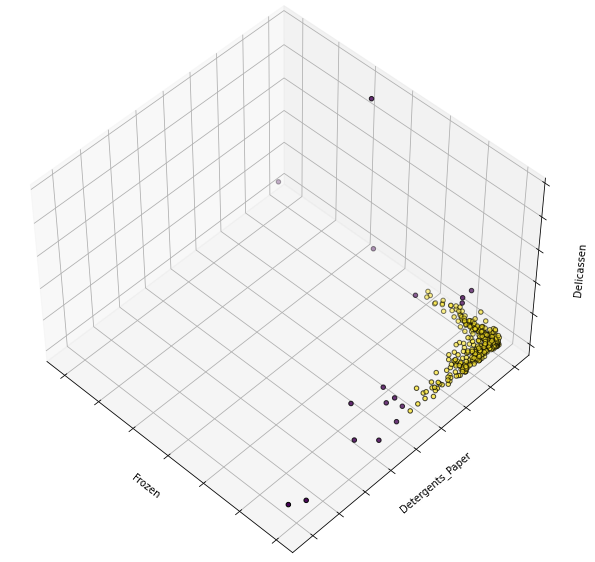

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(grocery_df.Frozen, grocery_df.Detergents_Paper, grocery_df.Delicassen,
           c=grocery_df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Frozen')
ax.set_ylabel('Detergents_Paper')
ax.set_zlabel('Delicassen')

In [32]:
colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
cur_df = pd.read_csv("anonymized-curriculum-access-07-2021.txt", 
                 sep="\s", 
                 header=None, 
                 names = colnames, 
                 usecols=[0, 2, 3, 4, 5])

In [33]:
cur_df.to_csv('anonymized-curriculum-access.csv')